In [41]:
%matplotlib inline
import numpy as np
import sklearn as skl

In [42]:
train_path = 'mnist'
test_path = 'mnist.t'
data_dim = 784

def reader(path):
    data_img = []
    data_label = []
    with open(str(path),'r') as FP:
        for line in FP:
            segment = line.split(' ')
            label = segment[0]
            img = np.zeros(data_dim, dtype=np.float32)
            for v in segment[1:]:
                index, value = v.split(':')
                img[int(index)] = float(value) / 255.
            data_img.append(img)
            data_label.append(int(label))
    return np.array(data_img), np.array(data_label)



In [43]:
training_img, training_label = reader(train_path)
testing_img, testing_label = reader(test_path)
print len(training_img)
print len(testing_img)

60000
10000


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
reduced_train_img = pca.fit_transform(training_img)
print 'Information left: ', np.sum(pca.explained_variance_ratio_)

Information left:  0.643578


In [45]:
from sklearn.svm import SVC
clf = SVC(verbose=True)


10-fold Cross-validation

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, reduced_train_img, training_label, cv=10)
print ''
print '-'*8+' 10-fold cross-validation '+'-'*8
for s in scores:
    print s
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]
-------- 10-fold cross-validation --------
0.982517482517
0.976345160753
0.977670388269
0.979333333333
0.975166666667
0.977496249375
0.975995999333
0.974162360393
0.972986493247
0.983822548366
Accuracy: 0.98 (+/- 0.01)


Okay. Now testing on testing set.

In [47]:
reduced_testing_img = pca.transform(testing_img)
%time clf.fit(reduced_train_img, training_label)
predicted = clf.predict(reduced_testing_img)
confusion_metrix = skl.metrics.confusion_matrix(testing_label, predicted)
print confusion_metrix
inclass_precision = skl.metrics.classification_report(testing_label, predicted)
print inclass_precision

[LibSVM]CPU times: user 29.8 s, sys: 302 ms, total: 30.2 s
Wall time: 30.9 s
[[ 972    0    1    1    0    2    2    1    1    0]
 [   0 1129    2    2    0    0    0    0    1    1]
 [   2    0 1014    2    1    1    0    8    4    0]
 [   0    0    2  996    0    3    0    6    2    1]
 [   0    0    2    0  962    0    2    0    1   15]
 [   2    0    0   10    1  870    2    1    5    1]
 [   5    3    1    0    4    2  941    0    2    0]
 [   0    4    9    1    2    0    0  999    1   12]
 [   2    0    2    4    4    4    1    2  953    2]
 [   2    6    0    5   15    3    1   10    3  964]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.98      1010
          4       0.97      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.

In [48]:
mean_score_on_testing_set = clf.score(reduced_testing_img, testing_label)
print 'score on testing set:', mean_score_on_testing_set

score on testing set: 0.98


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

def plot_embedding(x_emb,y,n,title=''):
    cmap = plt.cm.gist_ncar_r
    ax = plt.subplot()
    for l in xrange(n):
        points = x_emb[y==l,:]
        ax.scatter(points[:,0], points[:,1], label=l, c=cmap(float(l)/float(n)))
    ax.legend(loc='lower right', frameon=True, prop={'size': 10})
    ax.set_title(title)
    plt.show()

In [50]:
from sklearn.manifold import TSNE as tSNE

tsne = tSNE(n_components=2)
emb_testing_img = tsne.fit_transform(testing_img)

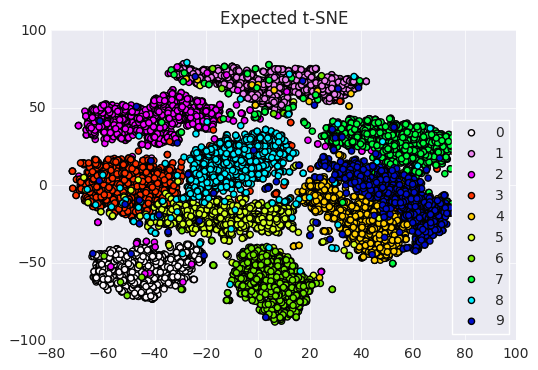

In [51]:
plot_embedding(emb_testing_img, testing_label, 10, 'Expected t-SNE')

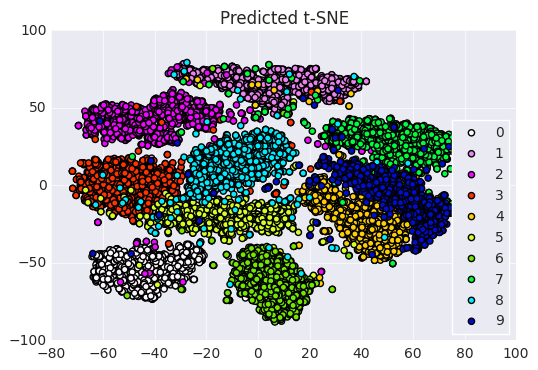

In [52]:
plot_embedding(emb_testing_img, predicted, 10, 'Predicted t-SNE')